In [1]:
import numpy as np
import random

from tadasets import dsphere
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

from ripser import ripser
from persim import plot_diagrams

from PersistenceLandscapeGrid import PersistenceLandscapeGrid, snap_PL, lc_grid
from PersistenceLandscapeExact import PersistenceLandscapeExact
from auxiliary import linear_combination
from visualization import plot_landscape, plot_landscape_exact

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from timeit import default_timer as timer

## Basic Usage

Load wine data set. 

Wine data has 3 classes and [59,71,48] samples per class. It has 178 samples total and 13 dimensions.

Load breast cancer data set. 

Breast cancer has 2 classes with 212(M) and 357(B) per class. It has 569 samples total and 30 dimensions. 

In [2]:
wine_data, wine_target = load_wine(return_X_y=True)
bc_data, bc_target = load_breast_cancer(return_X_y=True)

#### Standardize features and compute persistence diagrams. 

In [3]:
wine_data, wine_target = load_wine(return_X_y=True)
bc_data, bc_target = load_breast_cancer(return_X_y=True)

scaler = StandardScaler()
wine_data_scl = scaler.fit_transform(wine_data)
bc_data_scl = scaler.fit_transform(bc_data)

wine_dgms = ripser(wine_data_scl)['dgms']
bc_dgms = ripser(bc_data_scl)['dgms']



####  Plot persistence diagrams.

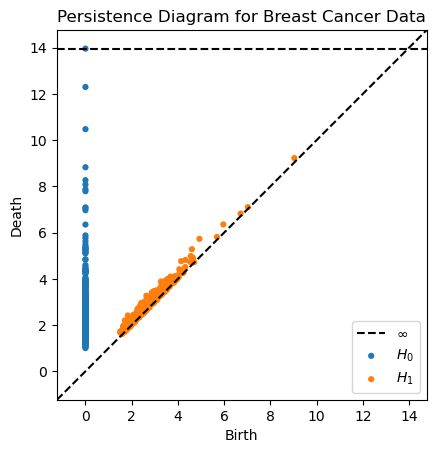

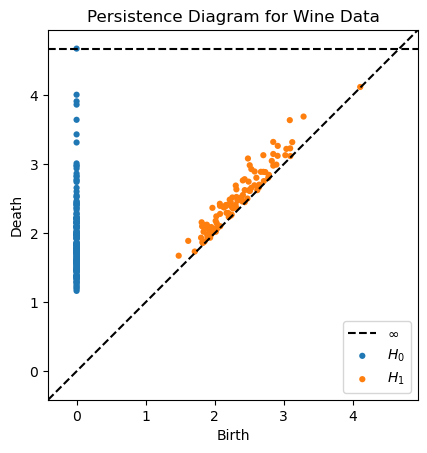

In [6]:
plot_diagrams(bc_dgms, show = True, title = 'Persistence Diagram for Breast Cancer Data')


plot_diagrams(wine_dgms, show = True, title = 'Persistence Diagram for Wine Data')

Compute Persistence Landscapes

#### Instantiate class

In [4]:
wine_pl = PersistenceLandscapeGrid(hom_deg = 1, dgms = wine_dgms)
bc_pl = PersistenceLandscapeGrid(hom_deg = 1, dgms = bc_dgms)

#### Compute Landscape

In [5]:
# compute landscapes 
start_exact = timer() #timer

wine_pl.compute_landscape()
bc_pl.compute_landscape()

stop_exact = timer()
print(f'PersistenceLandscapeGrid took {stop_exact-start_exact} seconds.')

PersistenceLandscapeGrid took 0.024025868999999034 seconds.


#### Critical values are stored in an attribute

In [46]:
wine_pl.values[0]

array([0.        , 0.00528523, 0.01057046, 0.01585569, 0.02114092,
       0.02642615, 0.03171138, 0.03699662, 0.04228185, 0.04756708,
       0.05285231, 0.05813754, 0.06342277, 0.068708  , 0.07399323,
       0.07927846, 0.08456369, 0.08984892, 0.10041939, 0.10041939,
       0.08984892, 0.08456369, 0.07927846, 0.07399323, 0.068708  ,
       0.06342277, 0.05813754, 0.05285231, 0.04756708, 0.04228185,
       0.03699662, 0.03171138, 0.03171138, 0.03699662, 0.04228185,
       0.04756708, 0.05285231, 0.05813754, 0.06342277, 0.068708  ,
       0.07399323, 0.07927846, 0.08456369, 0.08984892, 0.09513415,
       0.10041939, 0.10570462, 0.11098985, 0.11627508, 0.12156031,
       0.12684554, 0.13213077, 0.137416  , 0.13213077, 0.12684554,
       0.12156031, 0.11627508, 0.11098985, 0.10570462, 0.10041939,
       0.09513415, 0.08984892, 0.08456369, 0.07927846, 0.07399323,
       0.068708  , 0.06342277, 0.05813754, 0.05285231, 0.04756708,
       0.04756708, 0.05285231, 0.05813754, 0.06342277, 0.06870

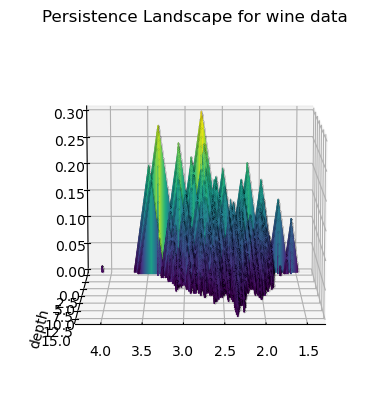

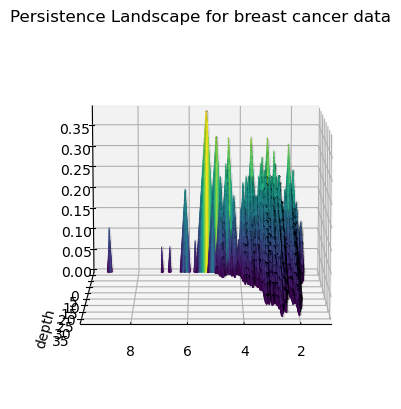

In [35]:
plot_landscape(wine_plg, title = 'Persistence Landscape for wine data')
plot_landscape(bc_plg, title = 'Persistence Landscape for breast cancer data')

#### Snap to the same grid.

In [47]:
# Snap landscapes to the same grid
wine_plg_snap, bc_pl_snap = snap_PL([wine_plg, bc_pl])

#### Find the difference of the two landscapes.

In [48]:
# compute difference
diff_pl = wine_plg_snap - bc_pl_snap

#### The difference of landscapes is a landscape

In [49]:
diff_pl

The persistence landscapes of diagrams in homological degree 1 on grid from 1.4780925512313843 to 9.222400665283203 with step size 500

#### Plot the difference.

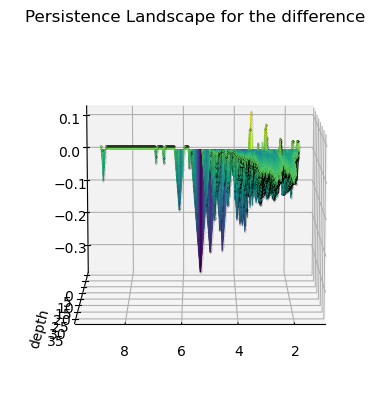

In [73]:
plot_landscape(diff_pl, title = 'Persistence Landscape for the difference')

Assign difference a numerical value by taking the sup norm.

In [50]:
diff = diff_pl.sup_norm()
print(f'The sup norm of the difference of landscapes is {diff}.')

The sup norm of the difference of landscapes is 0.3762143867049284.


## Experiemnt: $S^2$ vs. $S^3$ 

This notebook executes an experiemnt to see if persistence landscapes can tell the difference between a sphere in dimension 2 and 3.

#### Sample 100 points from $S^2$ and $S^3$, 100 times and normalize

In [2]:
# sph2: list of 100 runs of sampling S2
sph2 = []
for i in range(100):
    sph2.append( preprocessing.scale(dsphere(n=100, d=2, r=1)) ) #preprocessing.scale to normalize samples

# sph3: list of 100 runs of sampling S3
sph3 = []
for i in range(100):
    sph3.append( preprocessing.scale(dsphere(n=100, d=3, r=1)) )

#### Compute persistence diagram for $S^2$ and $S^3$

In [3]:
#sph2_dgm: list of 100 diagrams for 100 sampled points on S2
sph2_dgm = [ripser(sphere, maxdim=2)['dgms'] for sphere in sph2]


#sph3_dgm: list of 100 diagrams for 100 sampled points on S3
sph3_dgm = [ripser(sphere, maxdim=2)['dgms']for sphere in sph3]

#### Compute persistence landscape for $S^2$ and $S^3$

In [4]:
# start_grid = timer()

# #sph2_PL1, sph2_PL2: list of 100 landscapes for 100 sampled points on S3 in degree 1 and 2 
# sph2_PL1 = [PersistenceLandscapeGrid(dgms=diagram , hom_deg=1, compute=True) for diagram in sph2_dgm];
# sph2_PL2 = [PersistenceLandscapeGrid(dgms=diagram , hom_deg=2, compute=True) for diagram in sph2_dgm];

# #sph3_PL1, sph3_PL2: list of 100 landscapes for 100 sampled points on S3 in degree 1 and 2 
# sph3_PL1 = [PersistenceLandscapeGrid(dgms=diagram , hom_deg=1, compute=True) for diagram in sph3_dgm];
# sph3_PL2 = [PersistenceLandscapeGrid(dgms=diagram , hom_deg=2, compute=True) for diagram in sph3_dgm];

# stop_grid = timer()
# print(f'PersistenceLandscapeGrid took {stop_grid-start_grid} seconds.')

In [5]:
start_exact = timer()

#sph2_PL1, sph2_PL2: list of 100 landscapes for 100 sampled points on S3 in degree 1 and 2 
sph2_PL1 = [PersistenceLandscapeExact(dgms=diagram , hom_deg=1, compute=True) for diagram in sph2_dgm]
sph2_PL2 = [PersistenceLandscapeExact(dgms=diagram , hom_deg=2, compute=True) for diagram in sph2_dgm]

#sph3_PL1, sph3_PL2: list of 100 landscapes for 100 sampled points on S3 in degree 1 and 2 
sph3_PL1 = [PersistenceLandscapeExact(dgms=diagram , hom_deg=1, compute=True) for diagram in sph3_dgm]
sph3_PL2 = [PersistenceLandscapeExact(dgms=diagram , hom_deg=2, compute=True) for diagram in sph3_dgm]

stop_exact = timer()
print(f'PersistenceLandscapeExact took {stop_exact-start_exact} seconds.')

PersistenceLandscapeExact took 0.574866286999999 seconds.


#### Average the 100 landscapes for $S^2$ and $S^3$ in dimension 1 and 2

In [11]:
#avg2_hom1, avg2_hom2: average landscape for the 100 samples of S2 in degree 1 and 2 
avg2_hom1 = linear_combination(sph2_PL1,100*[1/100])
avg2_hom2 = linear_combination(sph2_PL2,100*[1/100])

#avg3_hom1, avg3_hom2: average landscape for the 100 samples of S3 in degree 1 and 2 
avg3_hom1 = linear_combination(sph3_PL1,100*[1/100])
avg3_hom2 = linear_combination(sph3_PL2,100*[1/100])

#### Compute the difference in sup norms between the average landscape of $S^2$ and $S^3$ in dimension 1 and 2

In [17]:
#diff_hom1, diff_hom2: difference between average landscapes in degree 1 and 2 of S2 and S3
true_diffpl_hom1 = (avg2_hom1 - avg3_hom1)
true_diff_hom1 = true_diffpl_hom1.sup_norm()

true_diffpl_hom2 = (avg2_hom2 - avg3_hom2)
true_diff_hom2 = true_diffpl_hom2.sup_norm()

#### Plot average landscape in degree 1 for S2 and S3 and difference between them 

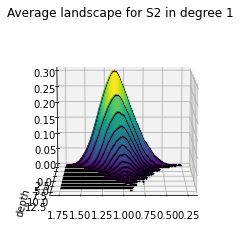

In [8]:
# plot avg S^2
plot_landscape_exact(avg2_hom1, title = 'Average landscape for S2 in degree 1') 

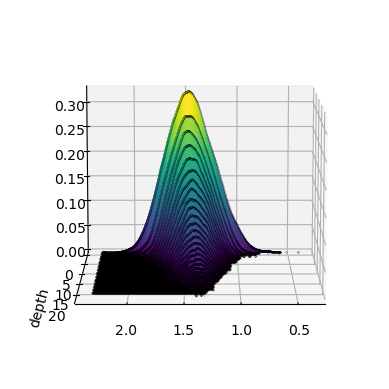

In [9]:
# plot avg S^3
plot_landscape(avg3_hom1, title = 'Average landscape for S2 in degree 1') 

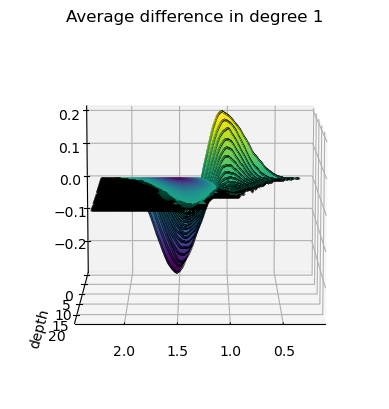

In [18]:
# plot diff
plot_landscape(true_diffpl_hom1, title = 'Average difference in degree 1')

### Run permutation test for homological degree 1

In [58]:
#PL1: persistence landscapes in degree 1 from S2 and S3
PL1 = []
PL1.extend(sph2_PL1)
PL1.extend(sph3_PL1)
PL1 = np.array(PL1) #cast as array in order to index with a list


for run in range(100):
    # shuffle labels for 200 landscapes
    A_indices = random.sample(range(100), 50)
    B_indices = [_ for _ in range(100) if _ not in A_indices]
    A_PL1 = PL1[A_indices]
    B_PL1 = PL1[B_indices]
    
    # take average of landscape with label A and label B resp.
    avg_A_PL1 = linear_combination(A_PL1,100*[1/100])
    avg_B_PL1 = linear_combination(B_PL1,100*[1/100])
    
    shuffled_diff_hom1 = (avg_A_PL1 - avg_B_PL1).sup_norm() #compute shuffled diff
    
    # count differences more extreme than true diff
    more_extreme = 0
    if np.abs(shuffled_diff_hom1) > np.abs(true_diff_hom1):
        more_extreme += 1

print(f'{more_extreme} of the relabeled persistence landscapes'
      'had difference more extreme than the true differnce')

KeyboardInterrupt: 

### Run permutation test for homological degree 2

In [28]:
#PL2: persistence landscapes in degree 1 from S2 and S3
PL2 = []
PL2.extend(sph2_PL2)
PL2.extend(sph3_PL2)
PL2 = np.array(PL2) #cast as array in order to index with a list


for run in range(100):
    # shuffle labels for 200 landscapes
    A_indices = random.sample(range(100), 50)
    B_indices = [_ for _ in range(100) if _ not in A_indices]
    A_PL2 = PL2[A_indices]
    B_PL2 = PL2[B_indices]
    
    # take average of landscape with label A and label B resp.
    avg_A_PL2 = linear_combination(A_PL2,100*[1/100])
    avg_B_PL2 = linear_combination(B_PL2,100*[1/100])
    
    shuffled_diff_hom2 = (avg_A_PL2 - avg_B_PL2).sup_norm() #compute shuffled diff
    
    # count differences more extreme than true diff
    more_extreme = 0
    if np.abs(shuffled_diff_hom2) > np.abs(true_diff_hom2):
        more_extreme += 1

print(f'{more_extreme} of the relabeled persistence landscapes'
      'had difference more extreme than the true differnce')

0 of the relabeled persistence landscapeshad difference more extreme than the true differnce


### For homological degree 1 and 2 there was no relabeling that resulted in persistence landscape difference that was more extreme than that of $S^2$ and $S^3$. So we conclude that the difference between $S^2$ and $S^3$ detected by persistence landscapes was significant.